## Preparation

In [1]:
import sys
sys.path.append("..")

In [2]:
import wfdb

from raccoon.utils.annotationutils import trigger_points

def read_record(path, sampto):
    record = wfdb.rdrecord(path, sampto=sampto)
    annotation = wfdb.rdann(path, 'atr', sampto=sampto)
    trigger = trigger_points(annotation)
    return record, trigger

def read_records(directory, names, sampto):
    records, triggers = [], []
    for name in names:
        path = "/".join([directory, name])
        record, trigger = read_record(path, sampto)
        records.append(record)
        triggers.append(trigger)
    return records, triggers

In [3]:
record_dir = "../data/mitdb"
test_names = ["100", "109"]
train_names = ["100", "101", "102", "103", "104"]
sampto = 10000

train_records, train_triggers = read_records(record_dir, train_names, sampto)
test_records, test_triggers = read_records(record_dir, test_names, sampto)

In [4]:
from raccoon.detectors import GarciaBerdonesDetector

detector = GarciaBerdonesDetector(
    name = "GarciaBerdones01",
    batch_size = 32,
    window_size = 20,
    epochs = 5)

detector.train(train_records, train_triggers)

Using TensorFlow backend.


Epoch 1/5
1559/1559 [==============================] - 2s 968us/step - loss: 0.0849
Epoch 2/5
1559/1559 [==============================] - 2s 984us/step - loss: 0.0401
Epoch 3/5
1559/1559 [==============================] - 2s 1ms/step - loss: 0.0349
Epoch 4/5
1559/1559 [==============================] - 2s 964us/step - loss: 0.0309
Epoch 5/5
1559/1559 [==============================] - 2s 1ms/step - loss: 0.03350


In [5]:
trigger_signals = detector.trigger_signals(test_records)

## (Nearly) Ideal Trigger Signal 

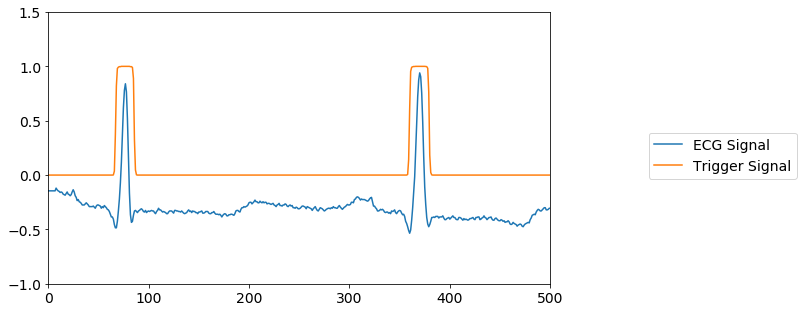

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

ideal_fig, ideal_ax = plt.subplots()
ideal_fig.set_size_inches(12, 5)

ideal_ax.plot(test_records[0].p_signal.T[0], label="ECG Signal")
ideal_ax.plot(trigger_signals[0], label="Trigger Signal")
ideal_ax.set_xlim(0,500)
ideal_ax.set_ylim(-1, 1.5)

# Shrink current axis by 25%
box = ideal_ax.get_position()
ideal_ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
ideal_fig.legend(loc='center right')

plt.show()

## Flawed Trigger Signal

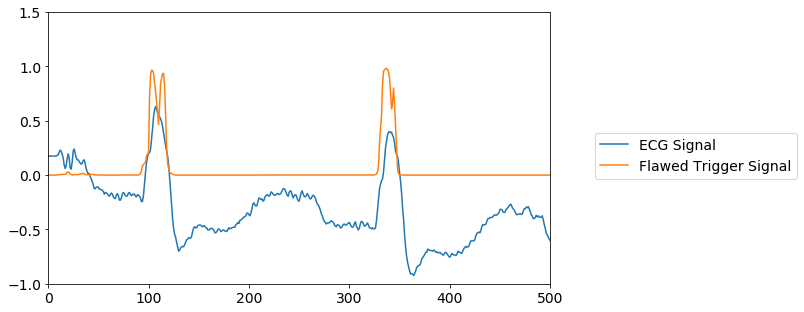

In [7]:
flawed_fig, flawed_ax = plt.subplots()
flawed_fig.set_size_inches(12, 5)

flawed_ax.plot(test_records[1].p_signal.T[0], label="ECG Signal")
flawed_ax.plot(trigger_signals[1], label="Flawed Trigger Signal")
flawed_ax.set_xlim(0,500)
flawed_ax.set_ylim(-1, 1.5)

# Shrink current axis by 25%
box = flawed_ax.get_position()
flawed_ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
flawed_fig.legend(loc='center right')

plt.show()

## Idealized Trigger Signal

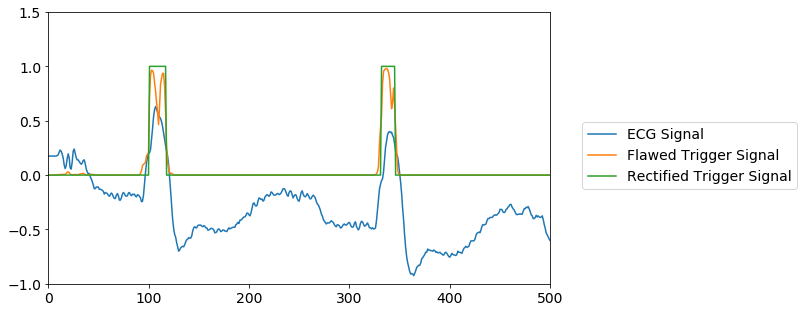

In [8]:
from raccoon.utils.triggerutils import discretize, remove_ripple

idealized_fig, idealized_ax = plt.subplots()
idealized_fig.set_size_inches(12, 5)

idealized_ax.plot(test_records[1].p_signal.T[0], label="ECG Signal")
idealized_ax.plot(trigger_signals[1], label="Flawed Trigger Signal")
idealized_ax.plot(
    list(remove_ripple(discretize(trigger_signals[1], threshold=.5), tolerance=5)),
    label="Rectified Trigger Signal")
idealized_ax.set_xlim(0,500)
idealized_ax.set_ylim(-1, 1.5)

# Shrink current axis by 25%
box = idealized_ax.get_position()
idealized_ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
idealized_fig.legend(loc='center right')

plt.show()

In [10]:
save = False

if save:
    ideal_fig.savefig(
        '../../msc-thesis/thesis/images/ideal_trigger_signal.png',
        bbox_inches = 'tight',
        pad_inches = 0)
    flawed_fig.savefig(
        '../../msc-thesis/thesis/images/flawed_trigger_signal.png',
        bbox_inches = 'tight',
        pad_inches = 0)
    idealized_fig.savefig(
        '../../msc-thesis/thesis/images/idealized_trigger_signal.png',
        bbox_inches = 'tight',
        pad_inches = 0)